## Predicciones para el mejor modelo de cada tipo combustible (Consumo e Importación)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from prophet import Prophet

### Cargar DataFrames

In [56]:
df_consumo = pd.read_csv('./df_consumo.csv', index_col='Fecha', parse_dates=True)
df_importacion = pd.read_csv('./df_importacion.csv', index_col='Fecha', parse_dates=True)

### Datos de Train y Test para ambos DataFrames

In [57]:
train_size_con = int(len(df_consumo) * 0.7)
train_consumo = df_consumo.iloc[:train_size_con]
test_consumo = df_consumo.iloc[train_size_con:]

In [58]:
train_size_imp = int(len(df_importacion) * 0.7)
train_importacion = df_importacion.iloc[:train_size_imp]
test_importacion = df_importacion.iloc[train_size_imp:]

### Transformación Logarítmica para ambos DataFrames

In [59]:
train_consumo_log = train_consumo.apply(np.log1p)
train_importacion_log = train_importacion.apply(np.log1p)

### Modelos de Predicción para las 6 series de tiempo realizadas

<p> Modelo para Gasolina Regular (consumo)</p>

In [60]:
serie = train_consumo_log['Gasolina regular']

In [61]:
regular_consumo = SARIMAX(serie, order=(1,0,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
res_regular_consumo = regular_consumo.fit()
print(res_regular_consumo.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9828      0.021     47.559      0.000       0.942       1.023
ma.L1         -0.5649      0.073     -7.752      0.000      -0.708      -0.422
ar.S.L12      -0.6134      0.070     -8.731      0.000      -0.751      -0.476
ar.S.L24      -0.2665      0.067     -4.002      0.000      -0.397      -0.136
sigma2         0.0058      0.001     10.121      0.000       0.005       0.007


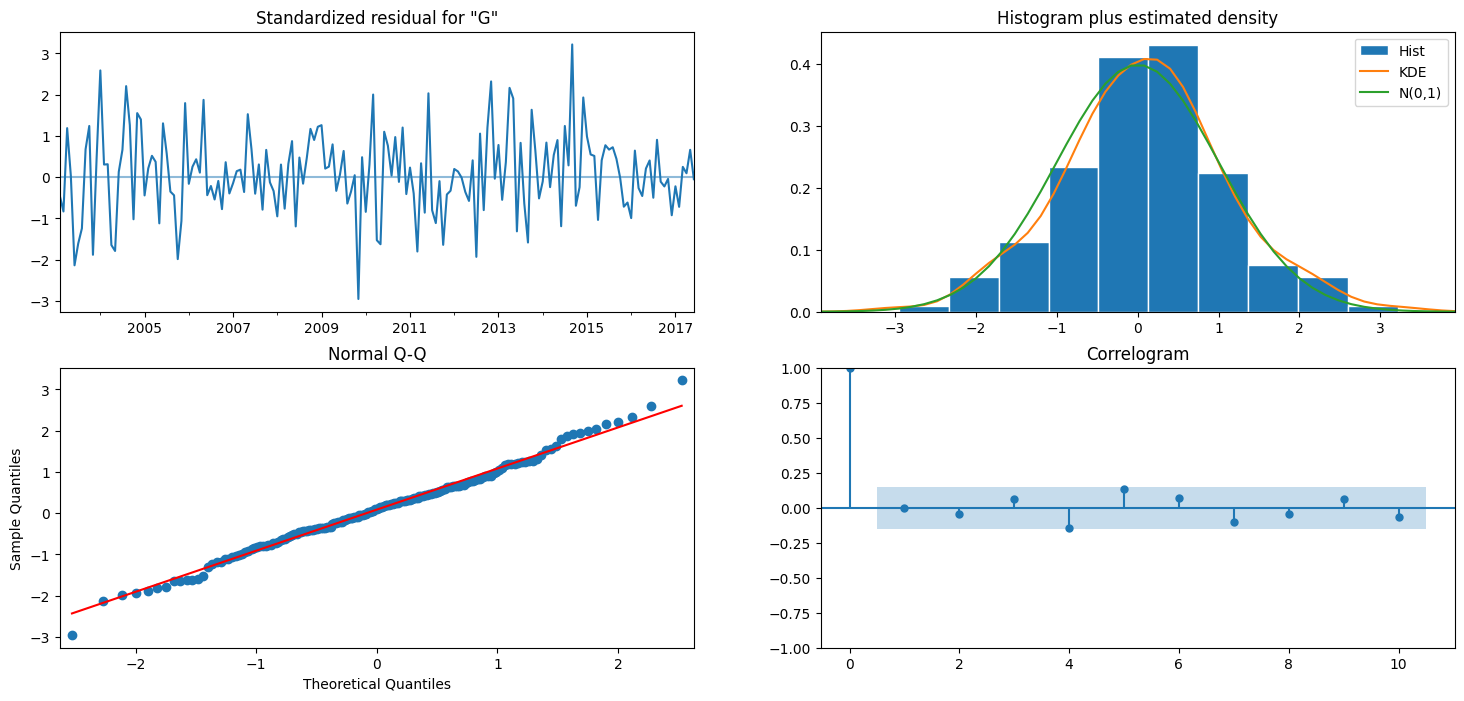

In [62]:
res_regular_consumo.plot_diagnostics(figsize=(18, 8))
plt.show()

In [63]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_regular_consumo.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_regular_consumo.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -390.1875072424512
Resultados de BIC (Bayesian information criterion)
Modelo 122= -374.4210492699623


<p> Modelo para Gasolina Superior (Consumo)</p>

In [64]:
serie = train_consumo_log['Gasolina superior']

In [65]:
superior_consumo = SARIMAX(serie, order=(2,0,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
res_superior_consumo = superior_consumo.fit()
print(res_superior_consumo.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0269      0.124      8.268      0.000       0.783       1.270
ar.L2         -0.0471      0.113     -0.417      0.677      -0.268       0.174
ma.L1         -1.5491      0.241     -6.430      0.000      -2.021      -1.077
ar.S.L12      -0.5786      0.074     -7.797      0.000      -0.724      -0.433
ar.S.L24      -0.3457      0.084     -4.119      0.000      -0.510      -0.181
sigma2         0.0013      0.000      3.294      0.001       0.001       0.002


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


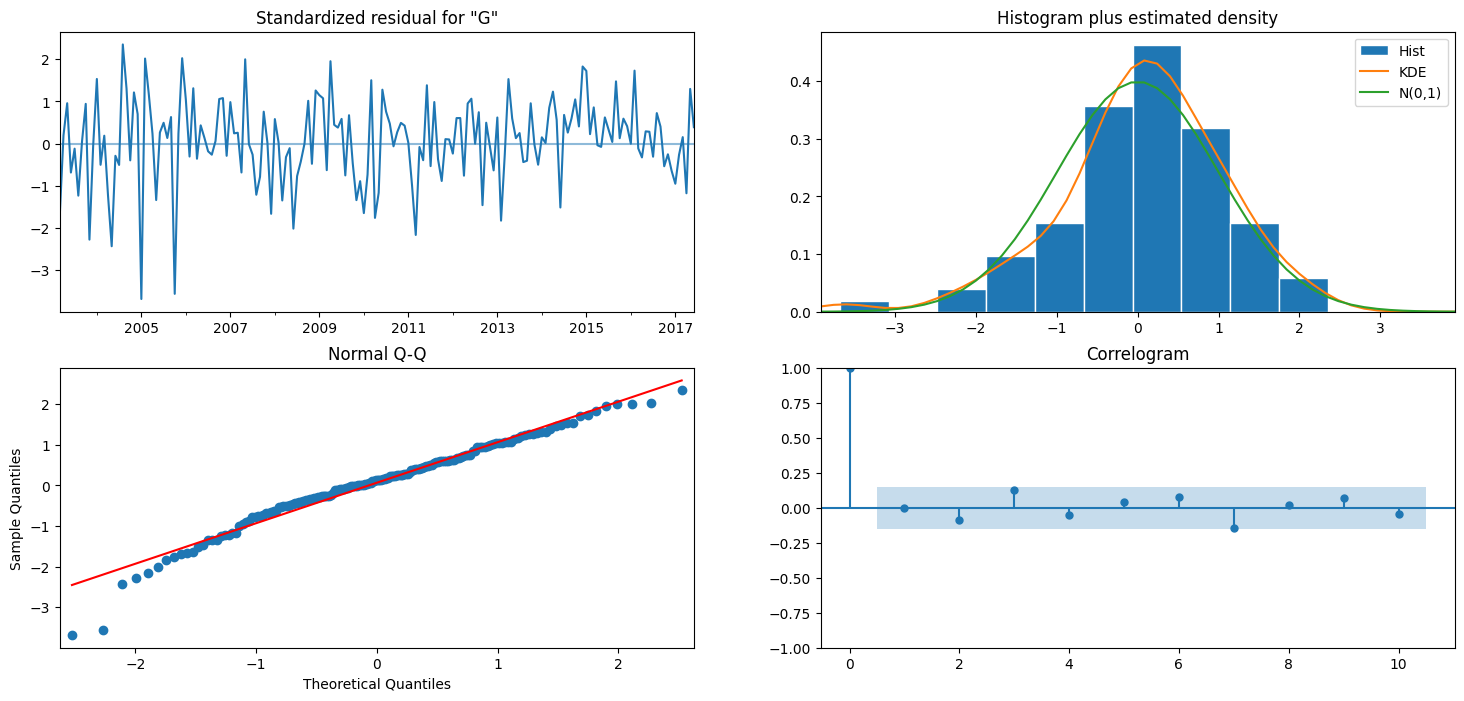

In [66]:
res_superior_consumo.plot_diagnostics(figsize=(18, 8))
plt.show()

In [67]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_superior_consumo.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_superior_consumo.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -491.69770196549916
Resultados de BIC (Bayesian information criterion)
Modelo 122= -472.81273510461847


<p> Modelo para Diesel (Consumo)</p>

In [68]:
serie = train_consumo_log['Diesel']

In [69]:
diesel_consumo = SARIMAX(serie, order=(2,1,2), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
res_diesel_consumo = diesel_consumo.fit()
print(res_diesel_consumo.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6245      0.395     -1.580      0.114      -1.399       0.150
ar.L2         -0.2117      0.112     -1.893      0.058      -0.431       0.007
ma.L1          0.0824      0.413      0.200      0.842      -0.726       0.891
ma.L2         -0.2088      0.259     -0.807      0.419      -0.716       0.298
ar.S.L12      -0.6514      0.080     -8.189      0.000      -0.807      -0.495
ar.S.L24      -0.3873      0.073     -5.312      0.000      -0.530      -0.244
sigma2         0.0048      0.000     12.091      0.000       0.004       0.006


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


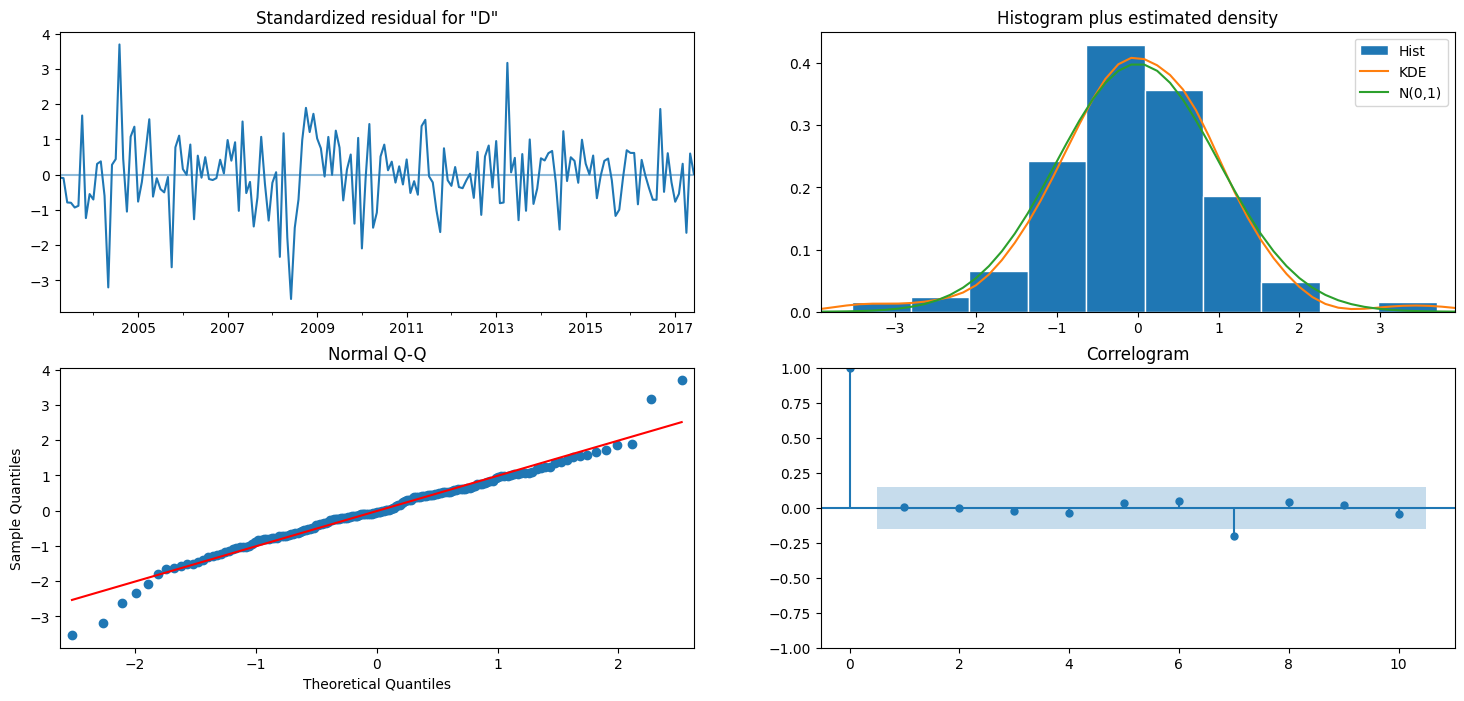

In [70]:
res_diesel_consumo.plot_diagnostics(figsize=(18, 8))
plt.show()

In [71]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_diesel_consumo.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_diesel_consumo.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -412.50188549685504
Resultados de BIC (Bayesian information criterion)
Modelo 122= -390.5102406013364


<p> Modelo para Gasolina Regular (Importación)</p>

In [72]:
serie = train_importacion_log['Gasolina regular']

In [73]:
regular_importacion = SARIMAX(serie, order=(2,0,2), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
res_regular_importacion = regular_importacion.fit()
print(res_regular_importacion.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2613      0.283     -0.923      0.356      -0.817       0.294
ar.L2          0.2204      0.081      2.709      0.007       0.061       0.380
ma.L1        -23.7421      1.703    -13.937      0.000     -27.081     -20.403
ma.L2         -6.9229      6.682     -1.036      0.300     -20.019       6.173
ar.S.L12      -0.5467      0.083     -6.618      0.000      -0.709      -0.385
ar.S.L24      -0.0501      0.080     -0.628      0.530      -0.206       0.106
sigma2         0.0002   3.59e-05      6.331      0.000       0.000       0.000


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


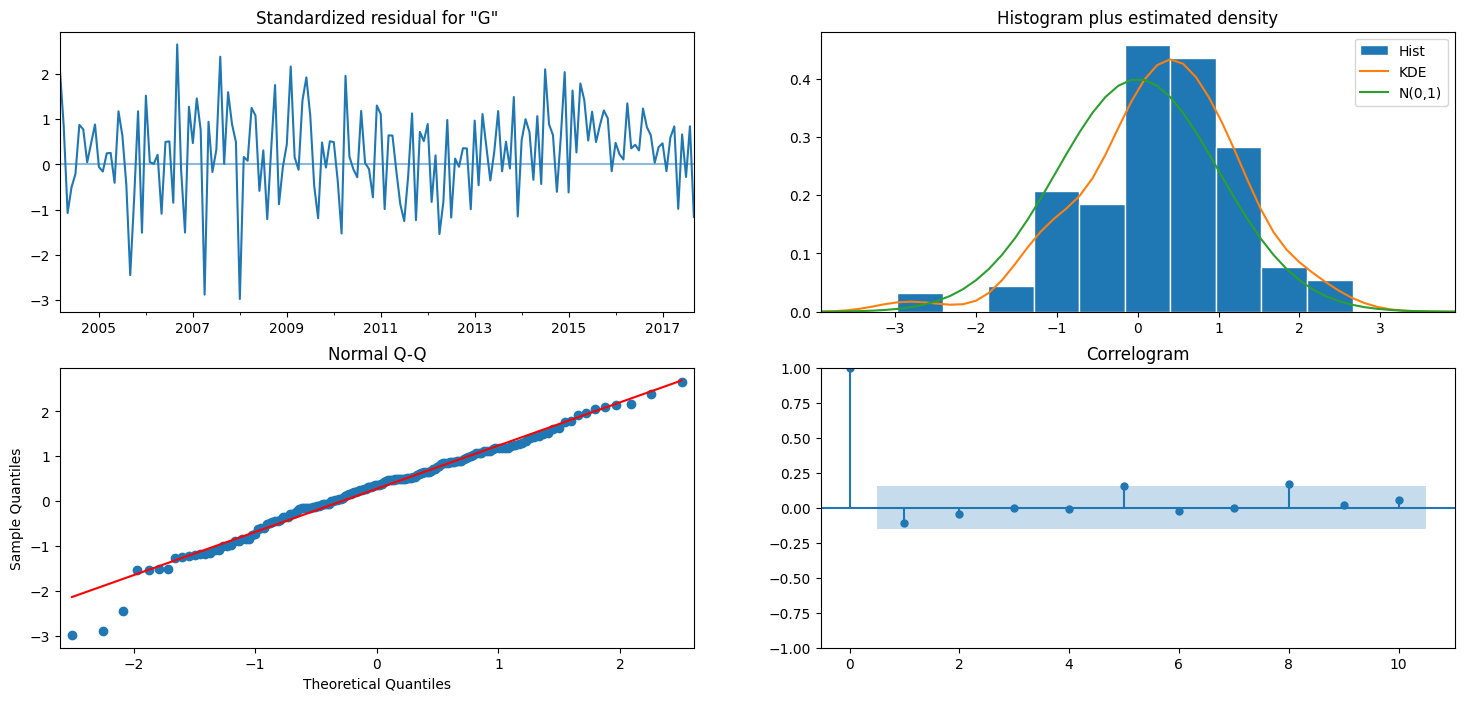

In [74]:
res_regular_importacion.plot_diagnostics(figsize=(18, 8))
plt.show()

In [75]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_regular_importacion.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_regular_importacion.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= 146.25365709036615
Resultados de BIC (Bayesian information criterion)
Modelo 122= 167.9099084960135


<p> Modelo para Gasolina Superior (Importación)</p>

In [76]:
serie = train_importacion_log['Gasolina superior']

In [77]:
superior_importacion = SARIMAX(serie, order=(2,1,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
res_superior_importacion = superior_importacion.fit()
print(res_superior_importacion.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3840      0.109     -3.535      0.000      -0.597      -0.171
ar.L2          0.0236      0.098      0.242      0.809      -0.168       0.215
ma.L1         -0.8944      0.056    -15.936      0.000      -1.004      -0.784
ar.S.L12      -0.7649      0.078     -9.772      0.000      -0.918      -0.611
ar.S.L24      -0.3742      0.068     -5.480      0.000      -0.508      -0.240
sigma2         0.0710      0.008      9.450      0.000       0.056       0.086


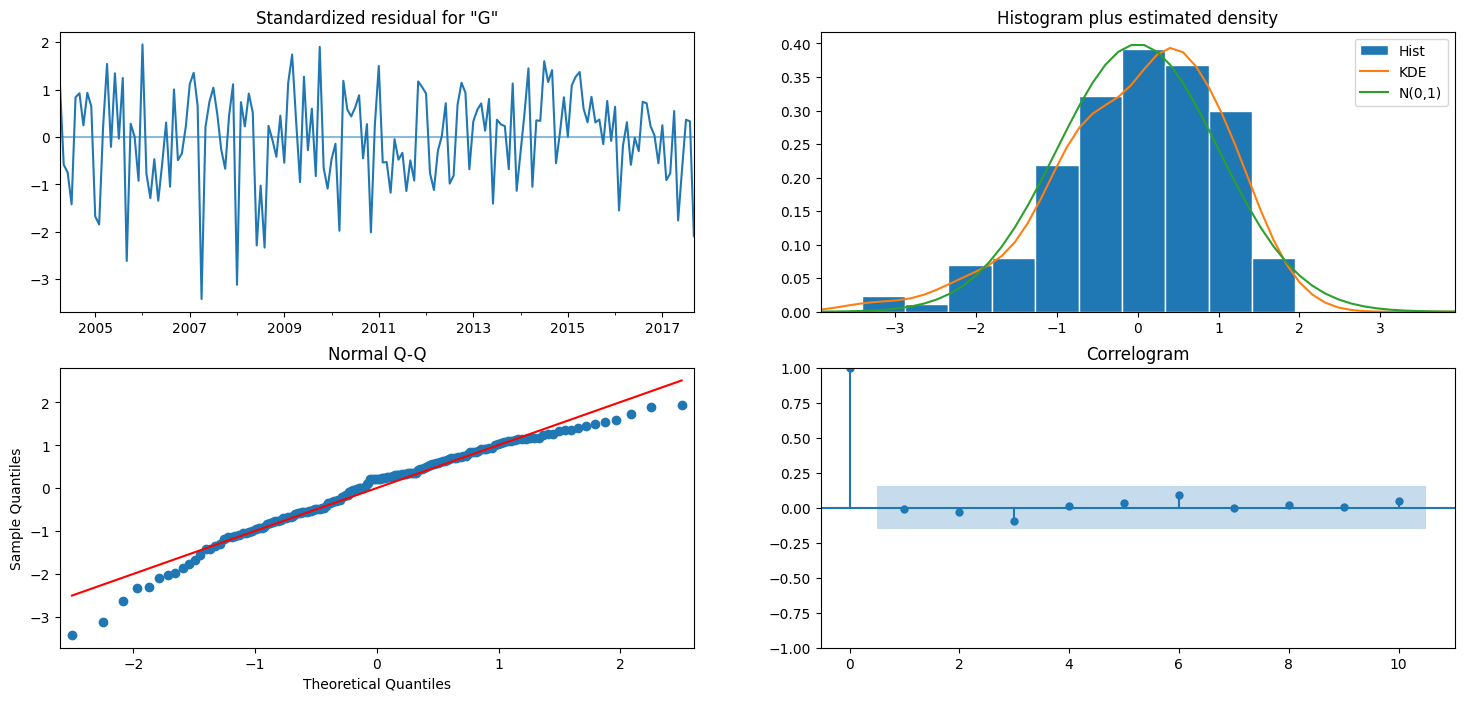

In [78]:
res_superior_importacion.plot_diagnostics(figsize=(18, 8))
plt.show()

In [79]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_superior_importacion.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_superior_importacion.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= 44.18217271995553
Resultados de BIC (Bayesian information criterion)
Modelo 122= 62.70775073134983


<p> Modelo para Diesel (Importación)</p>

In [80]:
serie = train_importacion_log['Diesel']

In [81]:
diesel_importacion = SARIMAX(serie, order=(1,0,1), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
res_diesel_importacion = diesel_importacion.fit()
print(res_diesel_importacion.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4811      0.615     -0.783      0.434      -1.686       0.724
ma.L1          0.3865      0.647      0.597      0.550      -0.881       1.654
ar.S.L12      -0.6182      0.076     -8.134      0.000      -0.767      -0.469
ar.S.L24      -0.2194      0.077     -2.852      0.004      -0.370      -0.069
sigma2         0.0864      0.009      9.293      0.000       0.068       0.105


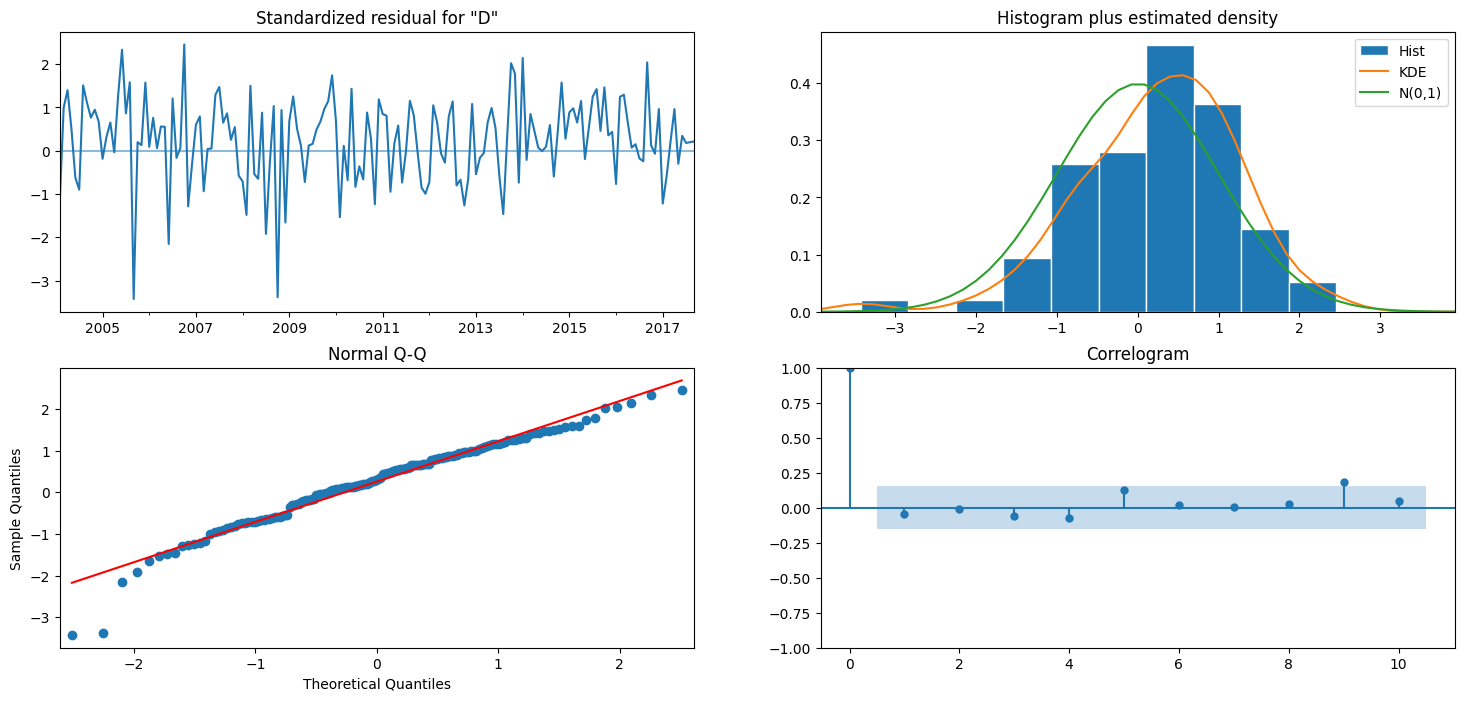

In [82]:
res_diesel_importacion.plot_diagnostics(figsize=(18, 8))
plt.show()

In [83]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_diesel_importacion.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_diesel_importacion.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= 73.88058568586771
Resultados de BIC (Bayesian information criterion)
Modelo 122= 89.3799178249887


### Predicción de los modelos en los últimos 3 años

In [84]:
start_test_con = test_consumo.index[0]
start_test_imp = test_importacion.index[0]

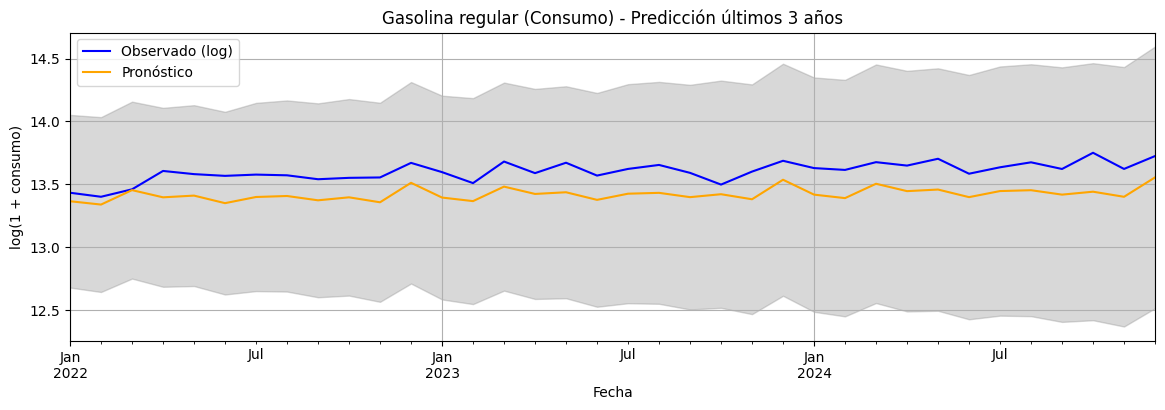

In [85]:
serie_completa = df_consumo['Gasolina regular'].apply(np.log1p)

pred = res_regular_consumo.get_prediction(
    start='2022-01-01',
    end='2024-12-01',  
    dynamic=False
)
pred_ci = pred.conf_int()

plt.figure(figsize=(14, 4))
ax = serie_completa['2022':].plot(label='Observado (log)', color='blue')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='gray', alpha=0.3)
plt.title('Gasolina regular (Consumo) - Predicción últimos 3 años')
plt.xlabel('Fecha')
plt.xlim(pd.to_datetime(['2022-01-01', '2024-12-31']))
plt.ylabel('log(1 + consumo)')
plt.legend()
plt.grid(True)
plt.show()


<small>

### Análisis de la predicción — Gasolina regular (Consumo)

En la gráfica se muestra la predicción para los últimos tres años de la serie de consumo de gasolina regular. Utilicé un modelo SARIMAX estacional, ya que en la descomposición se evidenció tanto una tendencia creciente como un componente estacional mensual.

La línea azul representa los valores observados (log-transformados) y la línea naranja representa los valores pronosticados por el modelo. En general, la predicción logra capturar el nivel promedio del consumo, aunque no alcanza a reflejar completamente la variabilidad mes a mes presente en los datos reales.

A pesar de esto, la mayoría de los valores reales se mantienen dentro del intervalo de confianza (sombra gris), lo cual indica que el modelo está bien calibrado y sus predicciones son consistentes con la incertidumbre esperada. Por tanto, considero que la predicción es aceptable, especialmente si se desea una visión general del comportamiento esperado del consumo.

</small>

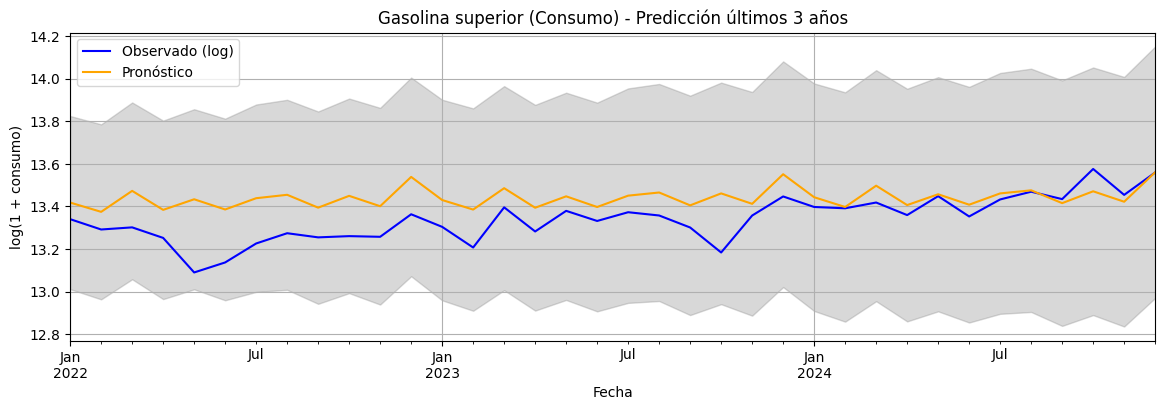

In [86]:
serie_completa = df_consumo['Gasolina superior'].apply(np.log1p)

pred = res_superior_consumo.get_prediction(
    start='2022-01-01',
    end='2024-12-01',  
    dynamic=False
)
pred_ci = pred.conf_int()

plt.figure(figsize=(14, 4))
ax = serie_completa['2022':].plot(label='Observado (log)', color='blue')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='gray', alpha=0.3)
plt.title('Gasolina superior (Consumo) - Predicción últimos 3 años')
plt.xlabel('Fecha')
plt.xlim(pd.to_datetime(['2022-01-01', '2024-12-31']))
plt.ylabel('log(1 + consumo)')
plt.legend()
plt.grid(True)
plt.show()


<small>

### Análisis de la predicción — Gasolina superior (Consumo)

Esta gráfica muestra la predicción del consumo de gasolina superior para los últimos tres años, utilizando un modelo SARIMAX ajustado a la serie log-transformada. Como en el caso anterior, se incorporó la estacionalidad debido a la presencia de ciclos anuales en la descomposición.

En este caso, el modelo logra capturar de forma razonable la tendencia general, pero se nota que la predicción (línea naranja) tiende a sobreestimar ligeramente los valores reales (línea azul), especialmente durante los primeros meses del periodo de predicción. A pesar de esta desviación, la mayor parte de los datos reales se mantienen dentro del intervalo de confianza, lo cual indica que el modelo no está completamente fuera de rango.

</small>

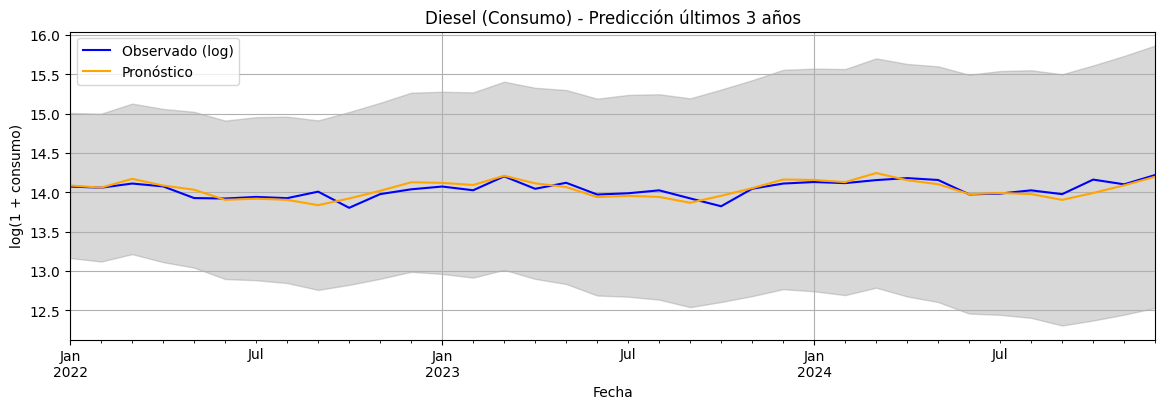

In [87]:
serie_completa = df_consumo['Diesel'].apply(np.log1p)

pred = res_diesel_consumo.get_prediction(
    start='2022-01-01',
    end='2024-12-01',  
    dynamic=False
)
pred_ci = pred.conf_int()

plt.figure(figsize=(14, 4))
ax = serie_completa['2022':].plot(label='Observado (log)', color='blue')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='gray', alpha=0.3)
plt.title('Diesel (Consumo) - Predicción últimos 3 años')
plt.xlabel('Fecha')
plt.xlim(pd.to_datetime(['2022-01-01', '2024-12-31']))
plt.ylabel('log(1 + consumo)')
plt.legend()
plt.grid(True)
plt.show()


<small>

### Análisis de la predicción — Diesel (Consumo)

Para esta serie de tiempo se trabajó con el consumo de diésel, considerando la unión de tres tipos distintos de combustible, lo cual incrementó el tamaño del dataset y permitió una mejor captura del comportamiento general.

La predicción se realizó con un modelo SARIMAX y se visualiza en la línea naranja, mientras que la línea azul representa los valores reales transformados con log(1 + x). A diferencia de las otras series, en este caso el modelo logra ajustarse muy bien al comportamiento observado, siguiendo de cerca la tendencia y la forma de la serie durante los tres años de prueba.

La cercanía entre la predicción y los valores reales, junto con la baja dispersión relativa dentro del intervalo de confianza, sugiere que esta fue una predicción bastante precisa. La buena calidad del ajuste puede atribuirse a la mayor cantidad de datos y a la consistencia que aporta la combinación de los diferentes tipos de diésel.
</small>

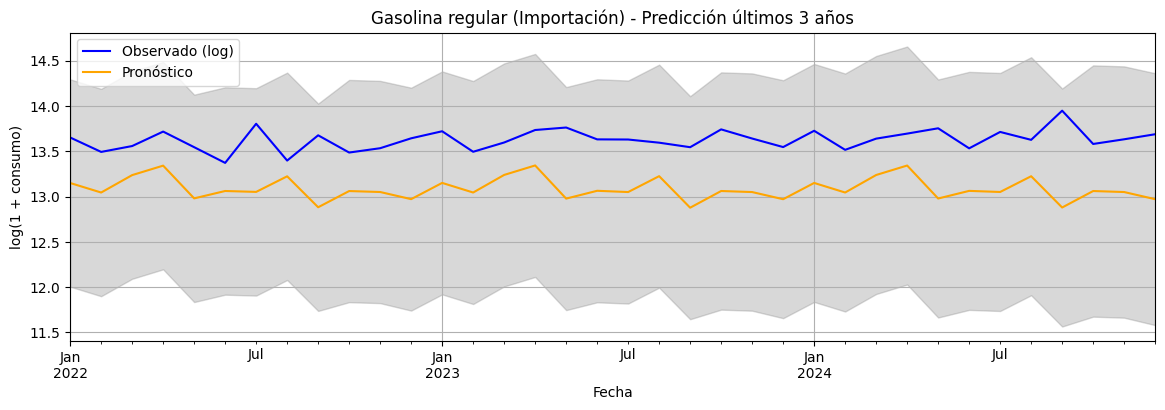

In [88]:
serie_completa = df_importacion['Gasolina regular'].apply(np.log1p)

pred = res_regular_importacion.get_prediction(
    start='2022-01-01',
    end='2024-12-01',  
    dynamic=False
)
pred_ci = pred.conf_int()

plt.figure(figsize=(14, 4))
ax = serie_completa['2022':].plot(label='Observado (log)', color='blue')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='gray', alpha=0.3)
plt.title('Gasolina regular (Importación) - Predicción últimos 3 años')
plt.xlabel('Fecha')
plt.xlim(pd.to_datetime(['2022-01-01', '2024-12-31']))
plt.ylabel('log(1 + consumo)')
plt.legend()
plt.grid(True)
plt.show()


<small>

### Análisis de la predicción — Gasolina Regular (Importación)

En esta gráfica se muestra la predicción del volumen importado de gasolina regular para los últimos tres años. Se aplicó un modelo SARIMAX sobre la serie log-transformada, tomando en cuenta la tendencia y posibles patrones cíclicos.

A diferencia de los casos anteriores, aquí se observa que el modelo subestima sistemáticamente los valores reales durante la mayor parte del periodo de predicción. La línea naranja (predicción) se mantiene por debajo de la línea azul (observado), aunque ambas conservan una forma general parecida. Esto sugiere que el modelo sí identifica la dirección general y parte de la estructura, pero no logra alcanzar el nivel real de la serie.

Sin embargo, los valores reales se mantienen dentro del intervalo de confianza, lo cual indica que el modelo no es completamente inadecuado, pero podría beneficiarse de ajustes en los parámetros o de un modelo más complejo. En resumen, la predicción es moderada, útil como referencia general, pero con margen de mejora.

</small>

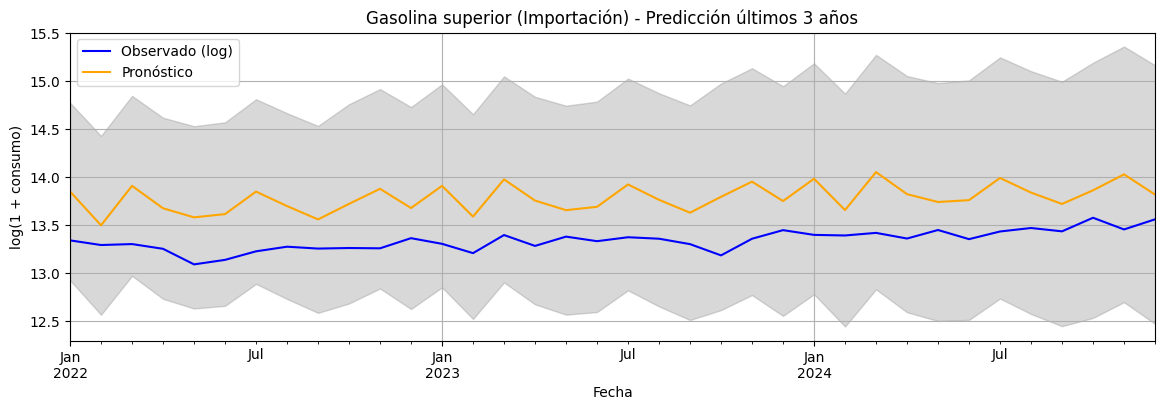

In [89]:
serie_completa = df_consumo['Gasolina superior'].apply(np.log1p)

pred = res_superior_importacion.get_prediction(
    start='2022-01-01',
    end='2024-12-01',  
    dynamic=False
)
pred_ci = pred.conf_int()

plt.figure(figsize=(14, 4))
ax = serie_completa['2022':].plot(label='Observado (log)', color='blue')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='gray', alpha=0.3)
plt.title('Gasolina superior (Importación) - Predicción últimos 3 años')
plt.xlabel('Fecha')
plt.xlim(pd.to_datetime(['2022-01-01', '2024-12-31']))
plt.ylabel('log(1 + consumo)')
plt.legend()
plt.grid(True)
plt.show()


<small>

### Análisis de la predicción — Gasolina Superior (Importación)

Esta gráfica presenta la predicción de las importaciones de gasolina superior durante los últimos tres años. El modelo SARIMAX fue ajustado a la serie log-transformada para capturar su comportamiento general, considerando tanto la tendencia como posibles variaciones periódicas.

A simple vista, el modelo muestra una clara sobreestimación respecto a los valores reales. La línea de predicción (naranja) se mantiene consistentemente por encima de los datos observados (azul), lo cual indica que el modelo no logró ajustarse correctamente al nivel de la serie. Esta discrepancia puede deberse a que el modelo no fue capaz de capturar cambios estructurales o variaciones recientes en el patrón de importación.

Aunque los valores reales se encuentran dentro del intervalo de confianza, la gran amplitud de esta banda gris revela una alta incertidumbre en la predicción. Por lo tanto, aunque técnicamente el modelo no falla completamente, su utilidad práctica es limitada en este caso.

</small>

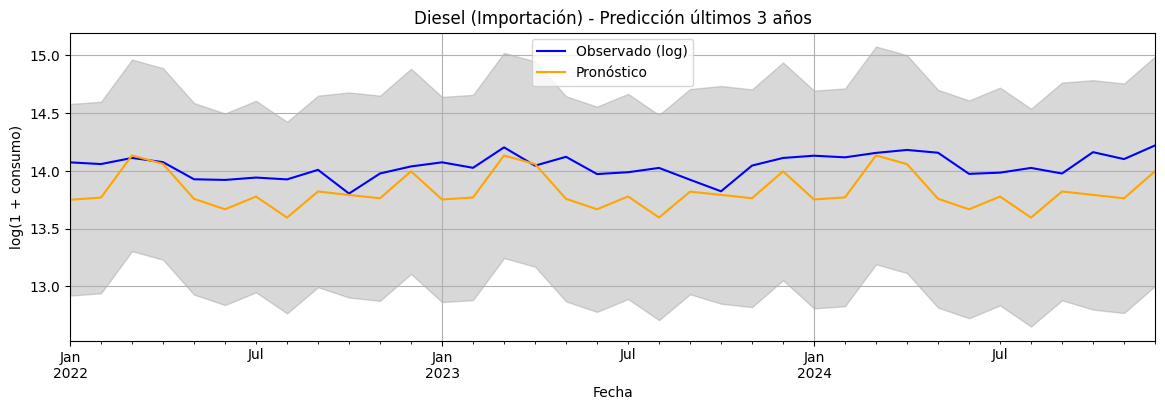

In [90]:
serie_completa = df_consumo['Diesel'].apply(np.log1p)

pred = res_diesel_importacion.get_prediction(
    start='2022-01-01',
    end='2024-12-01',  
    dynamic=False
)
pred_ci = pred.conf_int()

plt.figure(figsize=(14, 4))
ax = serie_completa['2022':].plot(label='Observado (log)', color='blue')
pred.predicted_mean.plot(ax=ax, label='Pronóstico', color='orange')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1],
                color='gray', alpha=0.3)
plt.title('Diesel (Importación) - Predicción últimos 3 años')
plt.xlabel('Fecha')
plt.xlim(pd.to_datetime(['2022-01-01', '2024-12-31']))
plt.ylabel('log(1 + consumo)')
plt.legend()
plt.grid(True)
plt.show()


<small>

### Análisis de la predicción — Gasolina Regular (Importación)

En esta gráfica se presenta la predicción de las importaciones de diésel para los últimos tres años, basada en un modelo SARIMAX aplicado sobre la serie log-transformada. Al igual que con el consumo, esta serie fue construida uniendo varias categorías de diésel, lo que permite una mejor cobertura y mayor robustez de los datos.

En cuanto al rendimiento del modelo, se observa una subestimación constante: la línea de predicción (naranja) se mantiene por debajo de los valores observados (azul) durante la mayor parte del periodo. A pesar de esta diferencia, el modelo logra capturar en cierta medida la tendencia general de la serie, incluyendo algunos de los aumentos y descensos.

Es importante mencionar que, aunque los valores reales se ubican dentro del intervalo de confianza, la dispersión amplia de esta banda indica una mayor incertidumbre, lo cual reduce la precisión del modelo. Esto sugiere que la estructura de la serie puede estar influenciada por factores externos que el modelo no está considerando.

</small>